# Investigating Police Shootings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

police_killings = pd.read_csv("police_killings.csv", encoding="ISO-8859-1")

In [2]:
police_killings.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

Printing first few columns of data

In [3]:
police_killings.head(3)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312


** Printing to see deaths by ethnicity **

In [10]:
police_killings.raceethnicity.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

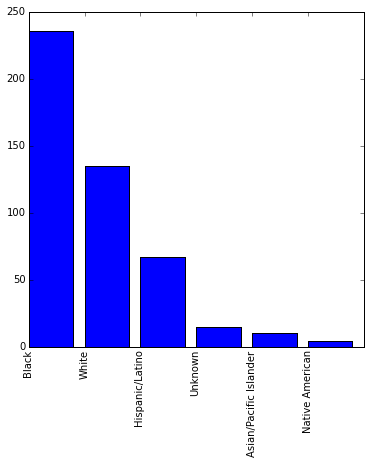

In [17]:
import numpy as np

locs = np.arange(0, police_killings.raceethnicity.nunique())

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

ax.bar(left=locs,height=police_killings.raceethnicity.value_counts())
ax.set_xticklabels(police_killings.raceethnicity.unique().tolist(),rotation=90)

plt.show()